
Para sintetizar e aplicar aquilo que foi visto durante o módulo, façam os seguintes exercícios

Nesse case, vocês terão acesso à base de dados com avaliações dos filmes da Netflix. Considerem os estudos em cima do Rating, onde queremos fazer análises estatísticas sobre essa variável.

#Estatística Descritiva

In [2]:
import pandas as pd
import numpy as np
import random
from scipy.stats import norm
import scipy.stats as st
import seaborn as sns

In [3]:
filmes = pd.read_csv('/content/n_movies.csv')
filmes

,title,year,certificate,duration,genre,rating,description,stars,votes
0,Cobra Kai,(2018– ),TV-14,30 min,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...","177,031"
1,The Crown,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,885"
2,Better Call Saul,(2015–2022),TV-MA,46 min,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...","501,384"
3,Devil in Ohio,(2022),TV-MA,356 min,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...","9,773"
4,Cyberpunk: Edgerunners,(2022– ),TV-MA,24 min,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...","15,413"
...,...,...,...,...,...,...,...,...,...
9952,The Imperfects,(2022– ),TV-MA,45 min,"Action, Adventure, Drama",6.3,After an experimental gene therapy turns them ...,"['Morgan Taylor Campbell, ', 'Italia Ricci, ',...","3,130"
9953,The Walking Dead,(2010–2022),TV-MA,44 min,"Drama, Horror, Thriller",8.1,Sheriff Deputy Rick Grimes wakes up from a com...,"['Andrew Lincoln, ', 'Norman Reedus, ', 'Melis...","970,067"
9954,The Crown,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,898"
9955,Supernatural,(2005–2020),TV-14,44 min,"Drama, Fantasy, Horror",8.4,Two brothers follow their father's footsteps a...,"['Jared Padalecki, ', 'Jensen Ackles, ', 'Jim ...","439,601"


In [4]:
#Tire as principais medidas das variávevis rating
filmes.describe()

,rating
count,8784.000000
mean,6.764515
std,1.214840
min,1.700000
25%,6.100000
50%,6.900000
75%,7.600000
max,9.900000


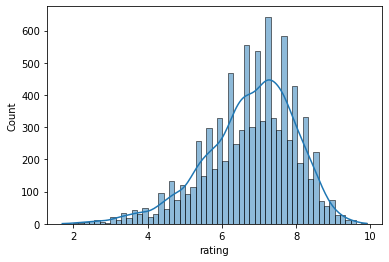

In [5]:
#Plote o hisograma e boxplot
#Veja que a mediana está bem proxima da media tendo uma distribuição quase que normal
sns.histplot(data=filmes, x='rating', kde=True);


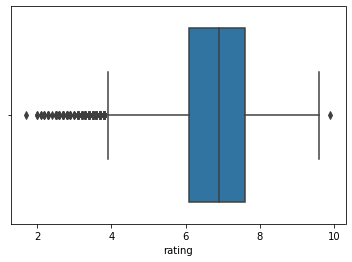

In [6]:
#Boxplot
#Temos novamente uma mediana bem centralizada. 
sns.boxplot(data=filmes, x='rating');

#Amostragem simples aleatória

Determine a quantidade ideal de elementos para esta amostra dado o tamnho do dataset

Considere o escore_z como 1.96, desvio padrão como 0.5, margem de erro em 0.05 e extraia a quantidade da população

Utilize a seguinte fórmula para calcular

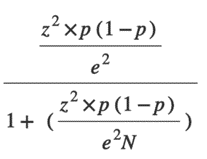


In [7]:
#primeiro preciso ver o tamanho da minha amostra.
filmes.shape

(9957, 9)

In [8]:
#verificando se temos dados nulos
filmes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9957 entries, 0 to 9956
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        9957 non-null   object 
 1   year         9430 non-null   object 
 2   certificate  6504 non-null   object 
 3   duration     7921 non-null   object 
 4   genre        9884 non-null   object 
 5   rating       8784 non-null   float64
 6   description  9957 non-null   object 
 7   stars        9957 non-null   object 
 8   votes        8784 non-null   object 
dtypes: float64(1), object(8)
memory usage: 700.2+ KB


In [9]:
#Por fim didatico removemos todos os dados nulos, é uma premissa de negocio.
filmes = filmes.dropna()
filmes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5754 entries, 0 to 9956
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        5754 non-null   object 
 1   year         5754 non-null   object 
 2   certificate  5754 non-null   object 
 3   duration     5754 non-null   object 
 4   genre        5754 non-null   object 
 5   rating       5754 non-null   float64
 6   description  5754 non-null   object 
 7   stars        5754 non-null   object 
 8   votes        5754 non-null   object 
dtypes: float64(1), object(8)
memory usage: 449.5+ KB


In [10]:
#Calcule o tamanho da amostra
z = 1.96
p = 0.5
e = 0.05
n= 5754

tamanho_amostra = ((z**2)*p*(1-p)/(e**2))/1+(((z**2)*p*(1-p))/((e**2)*n))
tamanho_amostra

384.22676399026756

# Amostragem sistemática

In [11]:
#Amostra simples
amostra_simples = filmes.sample(385, replace=True)
amostra_simples

,title,year,certificate,duration,genre,rating,description,stars,votes
8703,Oktoberfest: Beer & Blood,(2020),TV-MA,48 min,"Drama, History, Thriller",6.9,The murder of Ignatz Hoflinger shocks Munich b...,"['Hannu Salonen', '| ', ' Stars:', 'Misel M...",123
1652,The Real Housewives of New York City,(2008– ),TV-14,44 min,Reality-TV,4.6,A fast-paced reality show that follows several...,"['Ramona Singer, ', 'Luann de Lesseps, ', 'Son...","3,671"
671,Love,(2016–2018),TV-MA,50 min,"Comedy, Drama, Romance",7.7,A program that follows a couple who must navig...,"['Gillian Jacobs, ', 'Paul Rust, ', ""Claudia O...","42,755"
6213,Dilan 1991,(2019),TV-14,121 min,"Drama, Romance",6.5,Dilan and Milea officially date. But Dilan is ...,"['Pidi Baiq, ', 'Fajar Bustomi', '| ', ' St...","1,114"
5526,How to Get Over a Breakup,(2018),TV-MA,104 min,Comedy,6.1,"A heartbroken ad copywriter living in Lima, Pe...","['Bruno Ascenzo, ', 'Joanna Lombardi', '| ', '...","2,028"
...,...,...,...,...,...,...,...,...,...
7448,Sam Kinison: The Scream Continues,(2016),Not Rated,29 min,"Documentary, Short",6.4,Comedy Dynamics sat down with Sam Kinison's br...,"['Bill Kinison, ', 'Sam Kinison']",81
330,Reign,(2013–2017),TV-14,42 min,Drama,7.4,"Mary, Queen of Scots, faces political and sexu...","['Adelaide Kane, ', 'Megan Follows, ', 'Celina...","49,625"
527,Wentworth,(2013–2021),TV-MA,45 min,"Crime, Drama, Thriller",8.6,The confronting look into the lives of the inm...,"['Kate Atkinson, ', 'Katrina Milosevic, ', 'Ro...","22,295"
4575,Bill Burr: I'm Sorry You Feel That Way,(2014 TV Special),TV-MA,80 min,Comedy,8.2,Comedian Bill Burr's 2014 stand-up comedy spec...,"['Jay Karas', '| ', ' Star:', 'Bill Burr']","8,296"


In [12]:
#Faça uma função para definir a amostragem sistemática para saltar de 5 em 5
def amostragem_sistematica(df,step):
  indexes = np.arange(5,len(df), step=step)
  amostragem_sistematica = df.iloc[indexes]
  return amostragem_sistematica
amostra_sistematica = amostragem_sistematica(filmes,5)
#Visualizar a minha função
amostra_sistematica.head()

,title,year,certificate,duration,genre,rating,description,stars,votes
5,The Sandman,(2022– ),TV-MA,45 min,"Drama, Fantasy, Horror",7.8,Upon escaping after decades of imprisonment by...,"['Tom Sturridge, ', 'Boyd Holbrook, ', 'Patton...","116,358"
10,Stranger Things,(2016– ),TV-14,51 min,"Drama, Fantasy, Horror",8.7,"When a young boy disappears, his mother, a pol...","['Millie Bobby Brown, ', 'Finn Wolfhard, ', 'W...","1,149,889"
15,I Came By,(2022),TV-MA,110 min,Thriller,6.1,Follows a young graffiti artist who discovers ...,"['Babak Anvari', '| ', ' Stars:', 'Antonio ...","16,230"
22,Supernatural,(2005–2020),TV-14,44 min,"Drama, Fantasy, Horror",8.4,Two brothers follow their father's footsteps a...,"['Jared Padalecki, ', 'Jensen Ackles, ', 'Jim ...","439,597"
27,Shameless,(2011–2021),TV-MA,46 min,"Comedy, Drama",8.6,"A scrappy, feisty, fiercely loyal Chicago fami...","['Emmy Rossum, ', 'William H. Macy, ', 'Ethan ...","239,541"


## Teorema do Limite Central

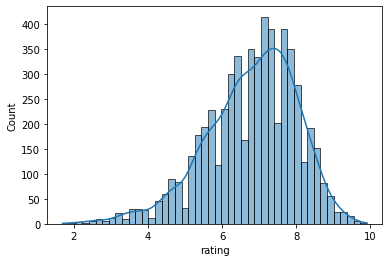

In [14]:
# Verifico a distribuição por histograma da minha variável "Rating"
sns.histplot(data=filmes, x='rating', kde=True);

In [15]:
#Transformo a coluna rating em lista
rating_values = filmes.rating.values.tolist()
print(rating_values)

[8.5, 8.7, 8.9, 5.9, 8.6, 7.8, 9.2, 9.5, 6.3, 6.2, 8.7, 4.7, 8.1, 8.1, 6.4, 6.1, 5.8, 8.8, 8.8, 7.6, 8.4, 8.0, 7.4, 7.8, 8.9, 8.6, 8.5, 8.5, 5.9, 6.5, 5.0, 8.5, 8.5, 8.2, 8.0, 8.9, 8.1, 7.9, 8.5, 6.8, 5.3, 8.8, 8.4, 8.0, 8.2, 8.4, 8.0, 7.9, 9.0, 7.1, 7.3, 6.1, 8.7, 8.4, 9.0, 7.7, 7.4, 8.2, 8.9, 8.2, 6.3, 8.3, 7.6, 8.5, 8.6, 7.7, 8.2, 6.5, 8.5, 7.4, 8.0, 9.0, 8.8, 8.3, 7.6, 7.8, 7.5, 6.6, 8.6, 8.7, 7.6, 8.6, 8.5, 8.6, 8.1, 7.7, 6.3, 3.3, 6.6, 7.9, 7.3, 9.1, 8.7, 7.7, 8.5, 6.7, 7.8, 8.1, 8.7, 8.9, 7.5, 8.7, 8.8, 8.4, 8.2, 8.1, 8.2, 8.3, 8.4, 7.7, 7.6, 7.6, 8.1, 5.8, 8.7, 8.5, 6.9, 7.5, 8.7, 8.6, 7.4, 8.6, 7.1, 7.6, 5.4, 7.7, 7.7, 7.7, 8.7, 8.4, 7.6, 6.8, 7.3, 8.8, 7.9, 8.3, 8.6, 8.4, 7.4, 8.4, 2.7, 7.2, 8.2, 8.4, 7.6, 5.4, 8.5, 8.5, 7.7, 6.2, 8.2, 7.7, 7.2, 8.0, 8.5, 7.5, 7.8, 8.2, 7.5, 6.6, 7.3, 2.6, 7.9, 8.7, 6.3, 8.5, 8.4, 8.1, 7.4, 5.0, 8.5, 8.4, 8.7, 8.4, 7.1, 7.2, 6.8, 7.5, 8.4, 7.8, 7.5, 8.1, 8.1, 8.8, 4.7, 9.3, 8.5, 7.8, 6.7, 5.7, 7.7, 7.5, 8.1, 7.0, 8.3, 6.2, 8.3, 8.4, 7.6, 8.5,

In [16]:
#Extraio a quantidade de amostras aleatórias com base na quantidade de amostras tiradas pelo cálculo
pop = rating_values 
means = []
for i in range(385):
  sample = random.sample(pop,k=385)
  means.append(np.mean(sample))
means

[6.7628571428571425,
 6.753766233766234,
 6.82987012987013,
 6.855584415584416,
 6.722077922077922,
 6.745194805194804,
 6.798181818181818,
 6.773246753246752,
 6.74987012987013,
 6.768051948051948,
 6.764675324675325,
 6.731688311688311,
 6.847272727272727,
 6.749090909090909,
 6.814545454545455,
 6.741558441558442,
 6.820779220779221,
 6.833246753246754,
 6.847012987012987,
 6.854285714285714,
 6.757922077922078,
 6.778181818181818,
 6.807272727272728,
 6.791948051948053,
 6.872207792207793,
 6.813506493506495,
 6.792207792207792,
 6.753246753246753,
 6.806233766233768,
 6.717662337662338,
 6.824935064935064,
 6.848311688311689,
 6.6805194805194805,
 6.856883116883117,
 6.812727272727272,
 6.748051948051948,
 6.795844155844155,
 6.8846753246753245,
 6.902077922077923,
 6.827272727272727,
 6.710649350649351,
 6.732467532467532,
 6.78051948051948,
 6.745194805194806,
 6.763376623376622,
 6.789870129870131,
 6.790649350649351,
 6.947792207792208,
 6.823636363636364,
 6.78,
 6.7787012987

In [18]:
#Média das amostras
np.mean(means)

6.791729465339856

In [19]:
#Média Populacional
np.mean(pop)

6.792822384428223

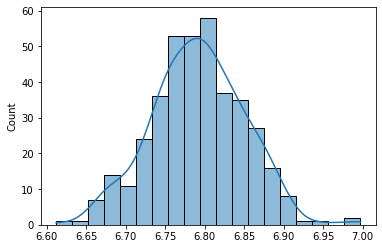

In [21]:
#Histograma das médias amostrais
sns.histplot(means, kde=True);

# Intervalo de Confiança
Vamos criar um intervalo de confiança com nível de confiança 95% para o rating populacional médio. Usar a distribuição t

In [23]:
test_95 = st.norm.interval(alpha=0.95, loc=np.mean(means), scale= st.sem(means))
test_95

(6.785878515183433, 6.797580415496278)